In [170]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Lasso

Задание 1

In [231]:
data = pd.read_csv("spam.csv")
labels = data["label"].values
x = data.drop(["label"], axis = 1).values
x_tr, x_ev, labels_tr, labels_ev = train_test_split(x, labels, train_size=0.8)

Accuracy  0.8360477741585234


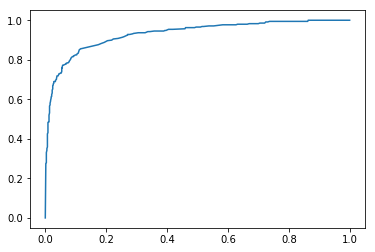

In [207]:
means = np.row_stack((np.array([0.0] * len(x_tr[0])), np.array([0.0] * len(x_tr[0]))))
vars = np.row_stack((np.array([0.0] * len(x_tr[0])), np.array([0.0] * len(x_tr[0]))))
for i in range(len(x[0])):
    means[0][i] = np.mean(x_tr[:, i][labels_tr == 0])
    means[1][i] = np.mean(x_tr[:, i][labels_tr == 1])
    vars[0][i] = np.var(x_tr[:, i][labels_tr == 0])
    vars[1][i] = np.var(x_tr[:, i][labels_tr == 1])

def norm(mu, sigma, x):
    return math.exp((-1) * (x - mu) * (x - mu) / (2 * sigma**2)) / (sigma * math.sqrt(2 * math.pi))

def prob(label, x):
    probs = np.array([0.0] * len(x))
    for i in range(len(x)):
        probs[i] = math.log(norm(means[label][i], vars[label][i], x[i]) + 0.00001)
    return probs

def classify(x):
    prs = np.array([1, 1])
    s = 0
    prs[0] = np.sum(prob(0, x))
    s += np.exp(prs[0])
    prs[1] = np.sum(prob(1, x))
    s += np.exp(prs[1])
    return np.exp(prs) / s

N = 0
tpfp = 0
classes = np.array([0] * len(x_ev))
arr = np.array([0.0] * len(x_ev))
for i in range(len(x_ev)):
    probs = classify(x_ev[i])
    arr[i] = probs[1]
    if probs[0] >= probs[1]:
        classes[i] = 0
    else:
        classes[i] = 1
    if classes[i] == labels_ev[i]:
        tpfp += 1
    N += 1
print("Accuracy ", tpfp / N)
fps, tps, _ = roc_curve(labels_ev, arr)
fig = plt.figure()
plt.plot(fps, tps)
plt.show()

Задание 2

In [208]:
data = pd.read_csv("smsspam.csv")
labels = data["label"].values
for i in range(len(labels)):
    if labels[i] == 'spam':
        labels[i] = 1
    else:
        labels[i] = 0
x = data.drop(["label"], axis = 1).values
new_x = np.array([])
for i in range(len(x)):
    new_x = np.append(new_x, x[i][0])
x = new_x
x = CountVectorizer().fit_transform(x)
x_tr, x_ev, labels_tr, labels_ev = train_test_split(x, labels, train_size=0.8)

Accuracy  0.989237668161435


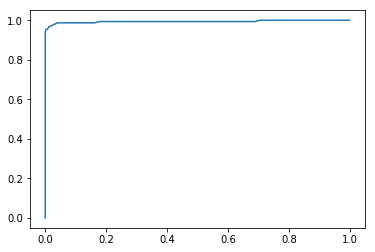

In [224]:
probabilities = np.row_stack((np.array([0.0] * x.shape[1]), np.array([0.0] * x.shape[1])))
probabilities[0] = np.asarray(np.mean(x_tr[labels_tr == 0], axis=0))
probabilities[1] = np.asarray(np.mean(x_tr[labels_tr == 1], axis=0))

def prob(label, x):
    probs = np.array(np.multiply(probabilities[label].reshape(1, -1), x) \
               + np.multiply((1 - probabilities[label].reshape(1, -1)), (1 - x)))
    probs = np.log(abs(probs + 0.0001))
    return probs

def classify(x):
    prs = np.array([1, 1])
    s = 0
    prs[0] = np.sum(prob(0, x))
    s += np.exp(prs[0])
    prs[1] = np.sum(prob(1, x)[0])
    s += np.exp(prs[1])
    return np.exp(prs) / s

 
N = 0
tpfp = 0
classes = np.array([0] * x_ev.shape[0])
arr = np.array([0.0] * x_ev.shape[0])
i = 0
for x1 in x_ev:
    probs = classify(x1.toarray())
    arr[i] = float(probs[1])
    if probs[0] >= probs[1]:
        classes[i] = 0
    else:
        classes[i] = 1
    if classes[i] == labels_ev[i]:
        tpfp += 1
    N += 1
    i += 1
print("Accuracy ", tpfp / N)
labels = []
for i in range(len(labels_ev)):
    if labels_ev[i] == 0:
        labels.append(0)
    else:
        labels.append(1)
fps, tps, _ = roc_curve(labels, arr)
fig = plt.figure()
plt.plot(fps, tps)
plt.show()

Задание 3

In [364]:
data_noisy = pd.read_csv("noisysine.csv")
labels_noisy = data_noisy["y"].values
x_noisy = data_noisy.drop(["y"], axis = 1).values + 0.0
x_noisy = np.column_stack((np.array([1.0] * len(x_noisy)), x_noisy))
x_noisy_tr, x_noisy_ev, labels_noisy_tr, labels_noisy_ev = train_test_split(x_noisy, labels_noisy, train_size=0.8)

In [365]:
w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr) @ np.transpose(x_noisy_tr) @ labels_noisy_tr

R2 linear regression, noisy  0.22073673470995958


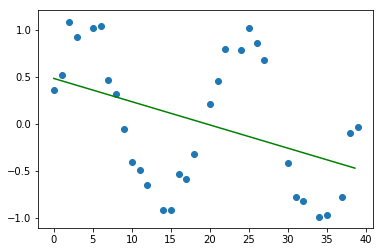

In [366]:
def r2(y, probs):
    return 1 - np.sum(np.square(probs - y)) / np.sum(np.square(np.mean(y) - y))

def graph(x_min, x_max, w):
    h = (x_max - x_min) / 100
    x = []
    y = []
    while x_min <= x_max:
        x.append(x_min)
        y_res = 0
        pow = 0
        for a in w:
            y_res += math.pow(x_min, pow) * a
            pow += 1
        y.append(y_res)
        x_min += h
    return (x, y)

print("R2 linear regression, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

In [367]:
pow = 2
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
pow += 1

In [368]:
w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr) @ np.transpose(x_noisy_tr) @ labels_noisy_tr

R2 polynomial regression, degree 2, noisy  0.20010723477999304


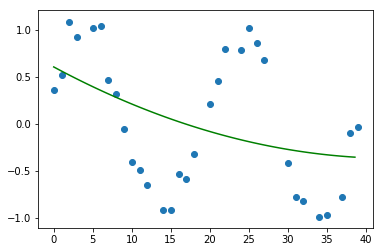

In [369]:
print("R2 polynomial regression, degree 2, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

In [370]:
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
pow += 1

In [371]:
w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr) @ np.transpose(x_noisy_tr) @ labels_noisy_tr

R2 polynomial regression, degree 3, noisy  0.36177512217085905


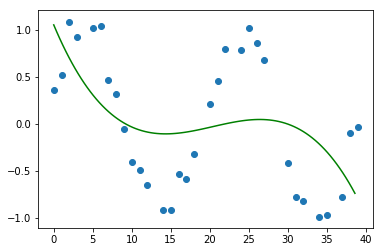

In [372]:
print("R2 polynomial regression, degree 3, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

In [373]:
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
pow += 1
w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr) @ np.transpose(x_noisy_tr) @ labels_noisy_tr

R2 polynomial regression, degree 4, noisy  0.3963392135155146


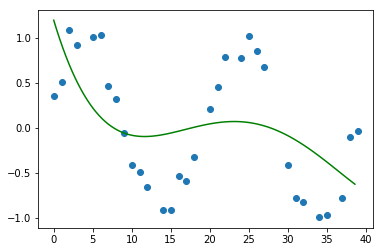

In [374]:
print("R2 polynomial regression, degree 4, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

In [375]:
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
pow += 1
w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr) @ np.transpose(x_noisy_tr) @ labels_noisy_tr

R2 polynomial regression, degree 5, noisy  0.8856891359392314


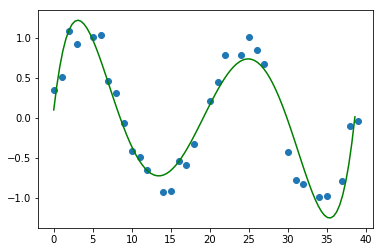

In [376]:
print("R2 polynomial regression, degree 5, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

In [220]:
data_hydro = pd.read_csv('hydrodynamics.csv')
labels_hydro = data_hydro['y'].values
x_hydro = data_hydro.drop(['y'], axis = 1).values + 0.0
x_hydro = np.column_stack((np.array([1.0] * len(x_hydro)), x_hydro))
x_hydro_tr, x_hydro_ev, labels_hydro_tr, labels_hydro_ev = train_test_split(x_hydro, labels_hydro, train_size=0.8)

In [221]:
w = np.linalg.inv(np.transpose(x_hydro_tr) @ x_hydro_tr) @ np.transpose(x_hydro_tr) @ labels_hydro_tr
print("R2 linear regression, hydro ", r2(labels_hydro_ev, x_hydro_ev @ w))

R2 linear regression, hydro  0.6622790907434218


In [222]:
def stack(i, j, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev):
    x_hydro_tr = np.column_stack((x_hydro_tr, (x_hydro_tr[:, i] * x_hydro_tr[:, j])))
    x_hydro_ev = np.column_stack((x_hydro_ev, (x_hydro_ev[:, i] * x_hydro_ev[:, j])))
    return x_hydro_tr, x_hydro_ev
x_hydro_tr, x_hydro_ev = stack(1,1, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,2, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,3, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(4,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(5,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(6,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,2, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,3, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,3, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(4,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(4,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(5,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)

In [223]:
w = np.linalg.inv(np.transpose(x_hydro_tr) @ x_hydro_tr) @ np.transpose(x_hydro_tr) @ labels_hydro_tr
print("R2 polinmial regression, hydro ", r2(labels_hydro_ev, x_hydro_ev @ w))

R2 polinmial regression, hydro  0.9263365413727371


Задание 4

R2 linear regression, noisy  0.1505649879484684
Alpha  11.99999999999999


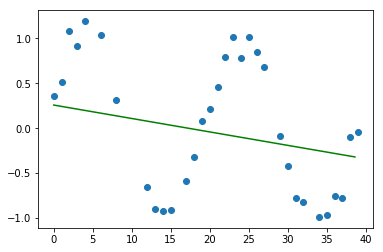

In [83]:
def r2(y, probs):
    return 1 - np.sum(np.square(probs - y)) / np.sum(np.square(np.mean(y) - y))

def graph(x_min, x_max, w):
    h = (x_max - x_min) / 100
    x = []
    y = []
    while x_min <= x_max:
        x.append(x_min)
        y_res = 0
        pow = 0
        for a in w:
            y_res += math.pow(x_min, pow) * a
            pow += 1
        y.append(y_res)
        x_min += h
    return (x, y)

max_r = 0
alpha = 0
best_w = None
data_noisy = pd.read_csv("noisysine.csv")
labels_noisy = data_noisy["y"].values
x_noisy = data_noisy.drop(["y"], axis = 1).values + 0.0
x_noisy = np.column_stack((np.array([1.0] * len(x_noisy)), x_noisy))
x_noisy_tr, x_noisy_ev, labels_noisy_tr, labels_noisy_ev = train_test_split(x_noisy, labels_noisy, train_size=0.8)
while True:
    w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr + alpha * np.ones(len(np.transpose(x_noisy_tr) @ x_noisy_tr))) \
        @ np.transpose(x_noisy_tr) @ labels_noisy_tr
    best_w = w
    r = r2(labels_noisy_ev, x_noisy_ev @ w)
    if max_r == 0:
        max_r = r
    elif r < max_r:
        break
    else:
        max_r = r
        alpha += 0.2
w = best_w
print("R2 linear regression, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
print("Alpha ", alpha)
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

R2 polynomial regression, degree 2, noisy  0.04579269403432529
Alpha  11.99999999999999


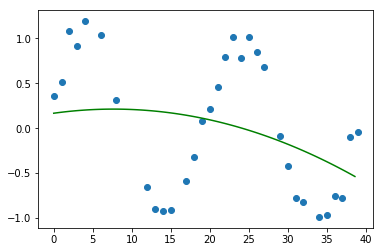

In [84]:
pow = 2
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
pow += 1
while True:
    w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr + alpha * np.ones(len(np.transpose(x_noisy_tr) @ x_noisy_tr))) \
        @ np.transpose(x_noisy_tr) @ labels_noisy_tr
    best_w = w
    r = r2(labels_noisy_ev, x_noisy_ev @ w)
    if max_r == 0:
        max_r = r
    elif r < max_r:
        break
    else:
        max_r = r
        alpha += 0.2
w = best_w
print("R2 polynomial regression, degree 2, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
print("Alpha ", alpha)
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

R2 polynomial regression, degree 3, noisy  0.1272257657613972
Alpha  11.99999999999999


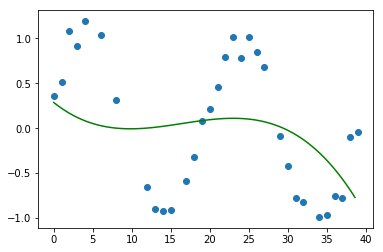

In [85]:
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
pow += 1
while True:
    w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr + alpha * np.ones(len(np.transpose(x_noisy_tr) @ x_noisy_tr))) \
        @ np.transpose(x_noisy_tr) @ labels_noisy_tr
    best_w = w
    r = r2(labels_noisy_ev, x_noisy_ev @ w)
    if max_r == 0:
        max_r = r
    elif r < max_r:
        break
    else:
        max_r = r
        alpha += 0.2
w = best_w
print("R2 polynomial regression, degree 3, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
print("Alpha ", alpha)
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

R2 polynomial regression, degree 4, noisy  0.08068427361892516
Alpha  11.99999999999999


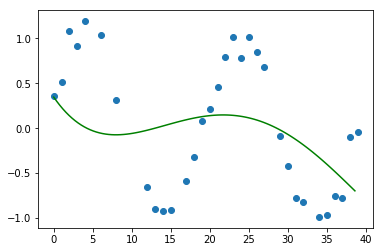

In [86]:
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
pow += 1
while True:
    w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr + alpha * np.ones(len(np.transpose(x_noisy_tr) @ x_noisy_tr))) \
        @ np.transpose(x_noisy_tr) @ labels_noisy_tr
    best_w = w
    r = r2(labels_noisy_ev, x_noisy_ev @ w)
    if max_r == 0:
        max_r = r
    elif r < max_r:
        break
    else:
        max_r = r
        alpha += 0.2
w = best_w
print("R2 polynomial regression, degree 4, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
print("Alpha ", alpha)
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

R2 polynomial regression, degree 5, noisy  0.9676892999125928
Alpha  12.199999999999989


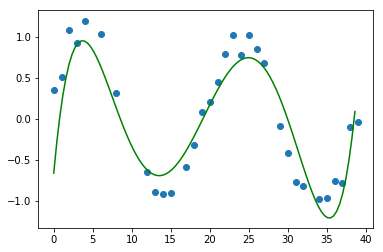

In [87]:
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
pow += 1
while True:
    w = np.linalg.inv(np.transpose(x_noisy_tr) @ x_noisy_tr + alpha * np.ones(len(np.transpose(x_noisy_tr) @ x_noisy_tr))) \
        @ np.transpose(x_noisy_tr) @ labels_noisy_tr
    best_w = w
    r = r2(labels_noisy_ev, x_noisy_ev @ w)
    if max_r == 0:
        max_r = r
    elif r < max_r:
        break
    else:
        max_r = r
        alpha += 0.2
w = best_w
print("R2 polynomial regression, degree 5, noisy ", r2(labels_noisy_ev, x_noisy_ev @ w))
print("Alpha ", alpha)
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
x, y = graph(np.min(x_noisy), np.max(x_noisy), w)
plt.plot(x, y, c='g')

In [224]:
data_hydro = pd.read_csv('hydrodynamics.csv')
labels_hydro = data_hydro['y'].values
x_hydro = data_hydro.drop(['y'], axis = 1).values + 0.0
x_hydro = np.column_stack((np.array([1.0] * len(x_hydro)), x_hydro))
x_hydro_tr, x_hydro_ev, labels_hydro_tr, labels_hydro_ev = train_test_split(x_hydro, labels_hydro, train_size=0.8)
max_r = 0
alpha = 0.0
best_w = None
while True:
    w = np.linalg.inv(np.transpose(x_hydro_tr) @ x_hydro_tr + alpha * np.ones(len(np.transpose(x_hydro_tr) @ x_hydro_tr))) \
        @ np.transpose(x_hydro_tr) @ labels_hydro_tr
    best_w = w
    r = r2(labels_hydro_ev, x_hydro_ev @ w)
    if max_r == 0:
        max_r = r
    elif r < max_r:
        break
    else:
        max_r = r
        alpha += 0.2
w = best_w
print("R2 linear regression, noisy ", r2(labels_hydro_ev, x_hydro_ev @ w))
print("Alpha ", alpha)
def stack(i, j, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev):
    x_hydro_tr = np.column_stack((x_hydro_tr, (x_hydro_tr[:, i] * x_hydro_tr[:, j])))
    x_hydro_ev = np.column_stack((x_hydro_ev, (x_hydro_ev[:, i] * x_hydro_ev[:, j])))
    return x_hydro_tr, x_hydro_ev
x_hydro_tr, x_hydro_ev = stack(1,1, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,2, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,3, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(4,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(5,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(6,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,2, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,3, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,3, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(4,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(4,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(5,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
max_r = 0
alpha = 0.2
best_w = None
while True:
    w = np.linalg.inv(np.transpose(x_hydro_tr) @ x_hydro_tr + alpha * np.ones(len(np.transpose(x_hydro_tr) @ x_hydro_tr))) \
        @ np.transpose(x_hydro_tr) @ labels_hydro_tr
    best_w = w
    r = r2(labels_hydro_ev, x_hydro_ev @ w)
    if max_r == 0:
        max_r = r
    elif r < max_r:
        break
    else:
        max_r = r
        alpha += 0.01
w = best_w
print("R2 polynomial regression, degree 2, hydro ", r2(labels_hydro_ev, x_hydro_ev @ w))
print("Alpha ", alpha)

R2 linear regression, noisy  0.6651025014588133
Alpha  0.2
R2 polynomial regression, degree 2, hydro  0.9127387348660462
Alpha  0.22000000000000003


Задание 5

R2 linear regression, noisy  -0.5000737126966717
Used features 1 from 2


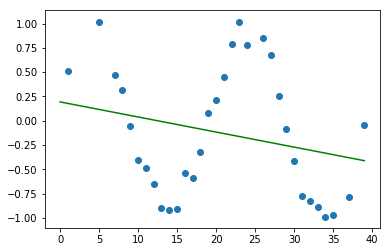

In [250]:
data_noisy = pd.read_csv("noisysine.csv")
labels_noisy = data_noisy["y"].values
x_noisy = data_noisy.drop(["y"], axis = 1).values + 0.0
x_noisy = np.column_stack((np.array([1.0] * len(x_noisy)), x_noisy))
x_noisy_tr, x_noisy_ev, labels_noisy_tr, labels_noisy_ev = train_test_split(x_noisy, labels_noisy, train_size=0.8)
model = Lasso(alpha=0.1)
model.fit(x_noisy_tr, labels_noisy_tr)
print("R2 linear regression, noisy ", r2(labels_noisy_ev, model.predict(x_noisy_ev)))
print("Used features " + str(len(model.coef_[model.coef_ != 0])) + " from " + str(len(model.coef_)))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
plt.plot(x_noisy[:, 1], model.predict(x_noisy), c='g')

R2 polynomial regression, degree 2, noisy  -0.620614969089117
Used features 1 from 3


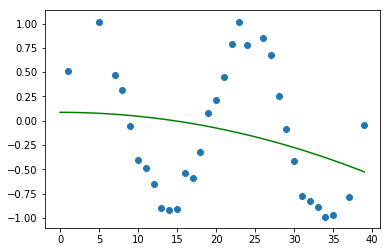

In [251]:
pow = 2
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
x_noisy = np.column_stack((x_noisy, np.power(x_noisy[:, 1], pow)))
pow += 1
model = Lasso(alpha=0.1)
model.fit(x_noisy_tr, labels_noisy_tr)
print("R2 polynomial regression, degree 2, noisy ", r2(labels_noisy_ev, model.predict(x_noisy_ev)))
print("Used features " + str(len(model.coef_[model.coef_ != 0])) + " from " + str(len(model.coef_)))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
plt.plot(x_noisy[:, 1], model.predict(x_noisy), c='g')

R2 polynomial regression, degree 3, noisy  -0.49256070696550536
Used features 3 from 4


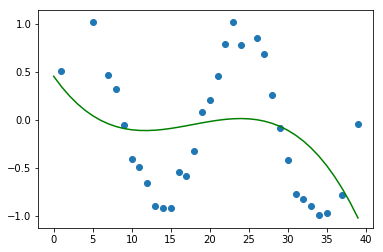

In [252]:
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
x_noisy = np.column_stack((x_noisy, np.power(x_noisy[:, 1], pow)))
pow += 1
model = Lasso(alpha=0.1)
model.fit(x_noisy_tr, labels_noisy_tr)
print("R2 polynomial regression, degree 3, noisy ", r2(labels_noisy_ev, model.predict(x_noisy_ev)))
print("Used features " + str(len(model.coef_[model.coef_ != 0])) + " from " + str(len(model.coef_)))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
plt.plot(x_noisy[:, 1], model.predict(x_noisy), c='g')

R2 polynomial regression, degree 4, noisy  -0.4683140854507388
Used features 4 from 5


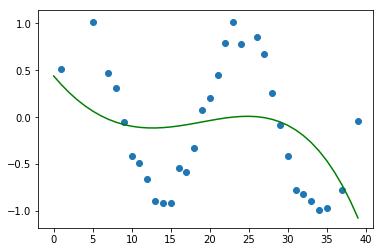

In [253]:
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
x_noisy = np.column_stack((x_noisy, np.power(x_noisy[:, 1], pow)))
pow += 1
model = Lasso(alpha=0.1)
model.fit(x_noisy_tr, labels_noisy_tr)
print("R2 polynomial regression, degree 4, noisy ", r2(labels_noisy_ev, model.predict(x_noisy_ev)))
print("Used features " + str(len(model.coef_[model.coef_ != 0])) + " from " + str(len(model.coef_)))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
plt.plot(x_noisy[:, 1], model.predict(x_noisy), c='g')

R2 polynomial regression, degree 5, noisy  -0.5130029427430423
Used features 5 from 6


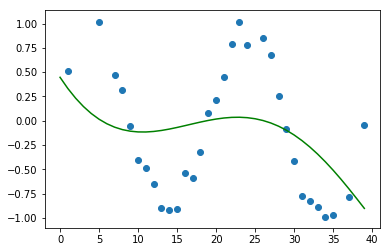

In [254]:
x_noisy_tr = np.column_stack((x_noisy_tr, np.power(x_noisy_tr[:, 1], pow)))
x_noisy_ev = np.column_stack((x_noisy_ev, np.power(x_noisy_ev[:, 1], pow)))
x_noisy = np.column_stack((x_noisy, np.power(x_noisy[:, 1], pow)))
pow += 1
model = Lasso(alpha=0.1)
model.fit(x_noisy_tr, labels_noisy_tr)
print("R2 polynomial regression, degree 5, noisy ", r2(labels_noisy_ev, model.predict(x_noisy_ev)))
print("Used features " + str(len(model.coef_[model.coef_ != 0])) + " from " + str(len(model.coef_)))
fig = plt.figure()
plt.scatter(x_noisy_tr[:, 1], labels_noisy_tr)
plt.plot(x_noisy[:, 1], model.predict(x_noisy), c='g')

In [257]:
data_hydro = pd.read_csv('hydrodynamics.csv')
labels_hydro = data_hydro['y'].values
x_hydro = data_hydro.drop(['y'], axis = 1).values + 0.0
x_hydro = np.column_stack((np.array([1.0] * len(x_hydro)), x_hydro))
x_hydro_tr, x_hydro_ev, labels_hydro_tr, labels_hydro_ev = train_test_split(x_hydro, labels_hydro, train_size=0.8)
model = Lasso(alpha=0.1)
model.fit(x_hydro_tr, labels_hydro_tr)
print("R2 linear regression, hydro ", r2(labels_hydro_ev, model.predict(x_hydro_ev)))
print("Used features " + str(len(model.coef_[model.coef_ != 0])) + " from " + str(len(model.coef_)))

R2 linear regression, hydro  0.6202852915409929
Used features 3 from 7


In [249]:
def stack(i, j, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev):
    x_hydro_tr = np.column_stack((x_hydro_tr, (x_hydro_tr[:, i] * x_hydro_tr[:, j])))
    x_hydro_ev = np.column_stack((x_hydro_ev, (x_hydro_ev[:, i] * x_hydro_ev[:, j])))
    return x_hydro_tr, x_hydro_ev
x_hydro_tr, x_hydro_ev = stack(1,1, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,2, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,3, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(4,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(5,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(6,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,2, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,3, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(1,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,3, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(2,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,4, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(3,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(4,5, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(4,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
x_hydro_tr, x_hydro_ev = stack(5,6, x_hydro_tr = x_hydro_tr, x_hydro_ev = x_hydro_ev)
model = Lasso(alpha=0.0001)
model.fit(x_hydro_tr, labels_hydro_tr)
print("R2 linear regression, hydro ", r2(labels_hydro_ev, model.predict(x_hydro_ev)))
print("Used features " + str(len(model.coef_[model.coef_ != 0])) + " from " + str(len(model.coef_)))

R2 linear regression, hydro  0.9328365318930808
Used features 27 from 28
